# Collisional Analysis

[coal]: ../../api_static/plasmapy.collisions.formulary.helio.collisional_analysis.rst
[maruca2013]: https://www.doi.org/10.1103/PhysRevLett.111.241101
[johnson2023]: https://www.doi.org/10.1103/PhysRevLett.111.241101

This notebook will introduce and demonstrate collisional analysis, the functionality is contained in the [collisional_analysis()][coal] module. Collisional analysis, first introduced by [Maruca 2013][maruca2013], uses the idea that Coulomb collisions - "soft," small-angle deflections mediated by the electrostatic force, act to erode non-local thermal equilibrium (LTE) features within the solar wind. Though remnants may persist through much of the inner heliosphere and beyond, this results in strong departures from LTE.

The theory behind this techniquie is detailed below, after which we show how to use the functionality and then apply it to observations. The final section compares observations from the Wind spacecraft with the predictions of this method.


## Contents

1. [Introudction](#Introduction)
2. [Application](#Application)
3. [Comparision](#Comparision)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from astropy import units as u

from plasmapy.formulary.collisions.helio import collisional_analysis as coal
from plasmapy.particles import Particle

plt.rcParams["figure.figsize"] = [10.5, 0.56 * 10.5]

[verscharen2019]: https://doi.org/10.1007/s41116-019-0021-0
[maruca2013]: https://www.doi.org/10.1103/PhysRevLett.111.241101

## Introduction

The processes by which collisions bring ion temperatures, especially those of protons $(T_{\rm p})$ and α-particles $(T_{\alpha})$, into LTE have received considerable attention. In situ observations of near-Earth solar wind have shown that the α-proton relative temperature,

$$
        \theta_{\alpha \rm p} = \frac{T_{\alpha}}{T_{\rm p}}

$$

varies widely [Verscharen 2019][verscharen2019]. Collisional analysis allows us to understand how the $\theta_{\alpha \rm p}$ temperature ratio should evolve as a function of distance from the Sun. The derived model from [Maruca 2013][maruca2013] gives the radial gradient in $\theta_{\alpha{\rm p}}$ as

$$
    \frac{d\theta_{\alpha {\rm p}}}{dr} = \left( \frac{An_{\rm p}}{v_{r\rm p}T^{3/2}_{\rm p}}  \right) \left( \frac{\mu_{\alpha}^{1/2}Z^{2}_{\alpha}(1 - \theta_{\alpha {\rm p}})(1 + \eta_{\alpha {\rm p}} \theta_{\alpha {\rm p}})}{(\mu_{\alpha} + \theta_{\alpha {\rm p}})^{3/2}} \right) \lambda_{\alpha \rm p} \ ,
$$

where

$$
   \lambda_{\alpha \rm p} = 9 + \ln \left[ B \left( \frac{T^{3/2}_{\rm p} (\mu_{\alpha} + \theta_{\alpha {\rm p}})}{n^{1/2}_{\rm p}Z_{\alpha}(1 + \mu_{\alpha})} \right) \left( 1 + \frac{Z^{2}_{\alpha} \eta_{\alpha \rm p} }{\theta_{\alpha {\rm p}}} \right)^{-1/2} \right] \ ,
$$


In these equations, $A = 2.60 \times 10^{7} \, {\rm cm}^{3} \, {\rm km} \, {\rm K}^{3/2} \, {\rm s}^{-1} \, {\rm au}^{-1}$, $B = 1 \, {\rm cm}^{-3/2}{\rm K}^{-3/2} $, $Z_\alpha \equiv q_\alpha/q_{\rm p} = 2$ is the $\alpha$-proton relative charge, $\mu_\alpha \equiv m_\alpha/m_{\rm p} \approx 4$ is their relative mass, and $\eta_{\alpha{\rm p}} \equiv n_\alpha/n_{\rm p}$ is the their relative abundance.

<div class="alert alert-info">

Assumptions

This model assumed the following conditions:

  * $\eta_{\alpha \rm p}$ remains fixed within any given parcel of plasma
  * The system is in a steady state
  * No relative drift between ion species
  * All particles are fully ionized

</div>


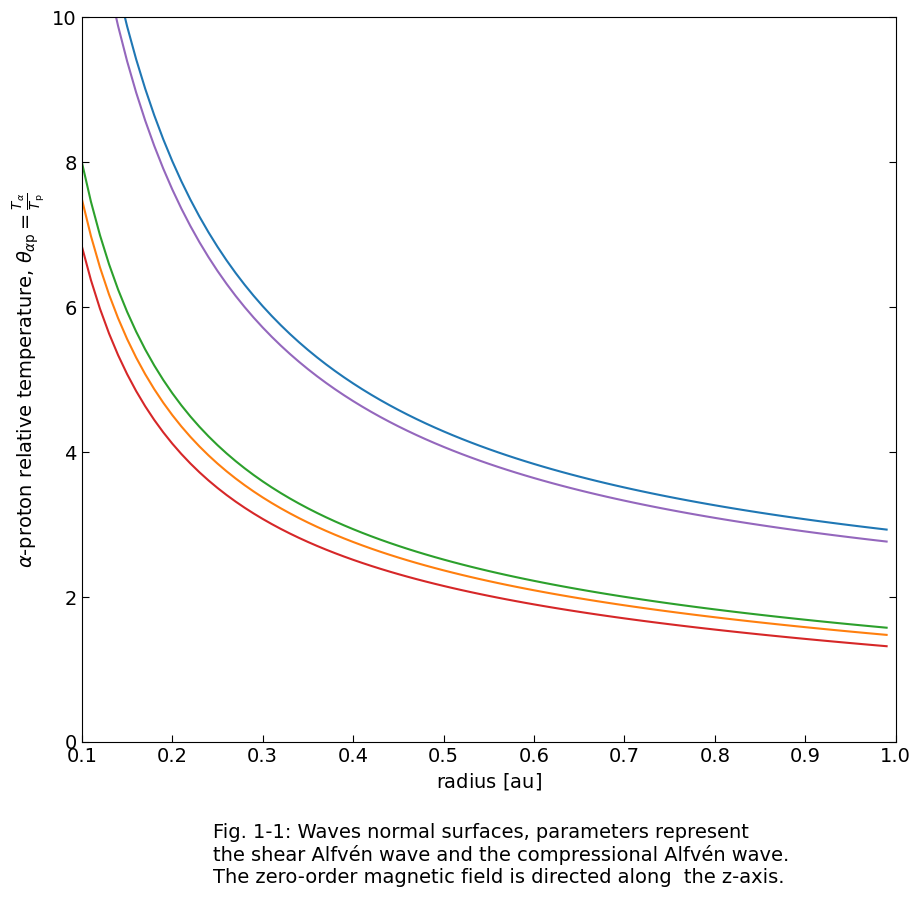

In [8]:
theta = {}
radii = np.arange(0.1, 1, 0.01).tolist()

# Define how many curves you want to produce, (Note: computation time will exponentially increase as the number of curves increases).
num_of_curves = 5

for i in range(num_of_curves):
    params = {
            "r_0": [0.1] * u.au,
            "r_n": [0] * u.au,
            "n_1": [random.randint(1000, 1500)] * u.cm**-3,
            "n_2": [random.randint(5, 25)] * u.cm**-3,
            "v_1": [random.randint(350, 450)] * u.km / u.s,
            "T_1": [ (1 + random.random()) * 10**5] * u.K,
            "T_2": [(1 + random.random()) * 10**6] * u.K,
            "ions": ["p+", "He-4++"],
        }
    theta[i] = []
    for radius in radii:
        params["r_n"] = [radius] * u.au
        theta[i].append(float(coal.temp_ratio(**params)[0]))

# Plot the results

fs = 14  # Default font size
figwidth, figheight = plt.rcParams["figure.figsize"]
figheight = 1.6 * figheight
fig = plt.figure(figsize=[figwidth, figheight])

for i in range(num_of_curves):
    plt.plot(radii, theta[i])

# Adjust axes
plt.xlabel(r"radius ${\rm [au]}$", fontsize=fs)
plt.ylabel(r"$\alpha$-proton relative temperature, $\theta_{\alpha \rm p} = \frac{T_{\alpha}}{T_{\rm p}}$", fontsize=fs)

plt.ylim(0, 15)
plt.xlim(0.1, 1)

plt.tick_params(
    which="both",
    direction="in",
    labelsize=fs,
    right=True,
    length=5,
)

# plot caption
txt = (
    f"Fig. 1-1: W"
)

plt.figtext(0.25, -0.04, txt, ha="left", fontsize=fs)

plt.show()


[maruca2013]: https://www.doi.org/10.1103/PhysRevLett.111.241101
[hellinger2011]: https://doi.org/10.1029/2011JA016674

<div class="alert alert-info">

Note:

The model allows parameters to vary with $r$. In particular, [Maruca 2013][maruca2013] used the following radial scaling based on the analysis of Helios observations by [Hellinger 2011][hellinger2011]:

$$
    n_{\rm p}(r) \propto r^{-1.8}\ , \hspace{1cm} v_{r\rm p}(r) \propto r^{-0.2}\ , \hspace{0.5cm} {\rm and} \hspace{0.5cm} T_{\rm p}(r) \propto r^{-0.74}
$$

These values are not fixed and can be altered within the function, they can be taken from simulations, data or both.

</div>

## Application

do the histograms here

## Comparision

here we introduce the wind data